How to start the sglang server?
```bash
python -m sglang.launch_server --model-path /mnt/nvme0/models/Meta-Llama-3.1-8B-Instruct/ --port 9999 --max-total-token 2048 --disable-radix-cache
```
We limited the max-total-token to simulate the memory constraint environment, use disable-radix-cache to shut down the prompt cache.

Profile
```bash
nsys profile --trace-fork-before-exec=true --cuda-graph-trace=node -o sglang.out --delay 60 --duration 70 python3 -m sglang.launch_server --model-path /mnt/nvme0/models/Meta-Llama-3.1-8B-Instruct/ --port 9999 --disable-radix-cache --enable-mixed-chunk --chunked-prefill-size 2048
```

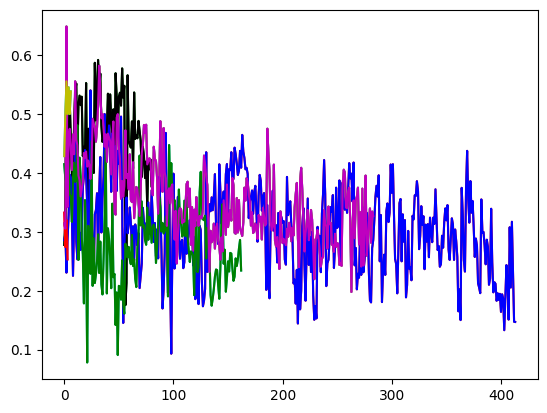

In [4]:
def draw_image_from_file():
    file = open('tmp/attention1.txt', 'r')
    lines = file.readlines()
    x = []
    y = []
    prev_a = -1
    list_idx = -1
    for line in lines:
        _, a, b = line.split(' ')
        a = int(a)
        b = float(b)
        if prev_a == -1 or a - prev_a != 1:
            prev_a = a
            x.append([])
            y.append([])
            list_idx += 1
        x[list_idx].append(a - prev_a)
        y[list_idx].append(b)
        prev_a = a
    # draw a line chart, different color for different x[i]
    import matplotlib.pyplot as plt
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in range(len(x)):
        # using the accordingly x-axis number
        plt.plot(y[i], color=colors[i % len(colors)])
    plt.show()
    # plt.savefig('tmp/attention1.png')
draw_image_from_file()

In [6]:
import requests
from pprint import pprint

url = "http://localhost:9999/generate"

data = {
    "text": ["What is AI?"],
    "sampling_params": {
        "temperature": 0,
        "max_new_tokens": 32,
    },
}

response = requests.post(url, json=data)
pprint(response.json())

[{'index': 0,
  'meta_info': {'cached_tokens': 0,
                'completion_tokens': 32,
                'completion_tokens_wo_jump_forward': 32,
                'finish_reason': {'length': 32, 'type': 'length'},
                'id': 'b3728b07fbd3466da6af3cb80d849922',
                'prompt_tokens': 4},
  'text': ' How does it work? How can it be used to solve real-world problems? '
          'In this course, you will learn about the basics of artificial '
          'intelligence, including the'}]


In [2]:
import os
os.system("~/miniconda3/envs/llm-exp/bin/python -m sglang.bench_serving  \
                                        --port 9999 \
                                        --backend sglang \
                                        --num-prompts 100 \
                                        --dataset-name random \
                                        --dataset-path /mnt/nvme0/chenjunyi/project/sglang/ShareGPT_V3_unfiltered_cleaned_split.json \
                                        --request-rate-range 1,2,4,8,16,32 --random-range-ratio 0.125 \
                                        --random-input 8192 --random-output 2048")
# os.system("~/miniconda3/envs/sglang/bin/python benchmark/benchmark_serving.py  \
#                         --port 9999 \
#                         --backend sglang \
#                         --dataset /home/chenjunyi/project/vllm/benchmarks/ShareGPT_V3_unfiltered_cleaned_split.json \
#                         --model /data/chenjunyi/models/qwen2-7b-chat/ \
#                         --num-prompts 50")

Namespace(backend='sglang', base_url=None, host='0.0.0.0', port=9999, dataset_name='random', dataset_path='/mnt/nvme0/chenjunyi/project/sglang/ShareGPT_V3_unfiltered_cleaned_split.json', model='/mnt/nvme0/models/Meta-Llama-3.1-8B-Instruct/', tokenizer=None, num_prompts=100, sharegpt_output_len=None, random_input_len=8192, random_output_len=2048, random_range_ratio=0.125, request_rate=inf, max_concurrency=None, seed=1, multi=False, request_rate_range='1,2,4,8,16,32', output_file=None, disable_tqdm=False, disable_stream=False, disable_ignore_eos=False, return_logprob=False, extra_request_body=None, gen_num_groups=64, gen_prompts_per_group=16, gen_system_prompt_len=2048, gen_question_len=128, gen_output_len=256, profile=False, lora_name=None)

#Input tokens: 421075
#Output tokens: 117417
Starting initial single prompt test run...
Initial test run completed. Starting main benchmark run...


100%|██████████| 100/100 [01:05<00:00,  1.52it/s]



============ Serving Benchmark Result ============
Backend:                                 sglang    
Traffic request rate:                    inf       
Max reqeuest concurrency:                not set   
Successful requests:                     100       
Benchmark duration (s):                  65.84     
Total input tokens:                      421075    
Total generated tokens:                  117417    
Total generated tokens (retokenized):    117396    
Request throughput (req/s):              1.52      
Input token throughput (tok/s):          6394.98   
Output token throughput (tok/s):         1783.24   
Total token throughput (tok/s):          8178.22   
----------------End-to-End Latency----------------
Mean E2E Latency (ms):                   49185.95  
Median E2E Latency (ms):                 51140.35  
---------------Time to First Token----------------
Mean TTFT (ms):                          8416.22   
Median TTFT (ms):                        8289.33   
P99 TTFT (ms):

0

In [ ]:
file = open('pd_sep_log.txt', 'r')
lines = file.readlines()
decode_reqs_list = []
decode_tokens_list = []
decode_context_tokens_list = []
prefill_reqs_list = []
prefill_tokens_list = []
execute_time_list = []
steps = range(1, len(lines) + 1)
for line in lines:
    # print(f"{decode_reqs} {decode_tokens} {decode_context_tokens} {prefill_reqs} {prefill_tokens}", file=open("output.txt", "a"), end=' ')
    decode_reqs, decode_new_tokens, decode_context_tokens, prefill_reqs, prefill_context_tokens, execute_time = line.split(' ')
    decode_reqs_list.append(int(decode_reqs))
    decode_tokens_list.append(int(decode_new_tokens))
    decode_context_tokens_list.append(int(decode_context_tokens))
    prefill_reqs_list.append(int(prefill_reqs))
    prefill_tokens_list.append(int(prefill_context_tokens))
    execute_time_list.append(float(execute_time))

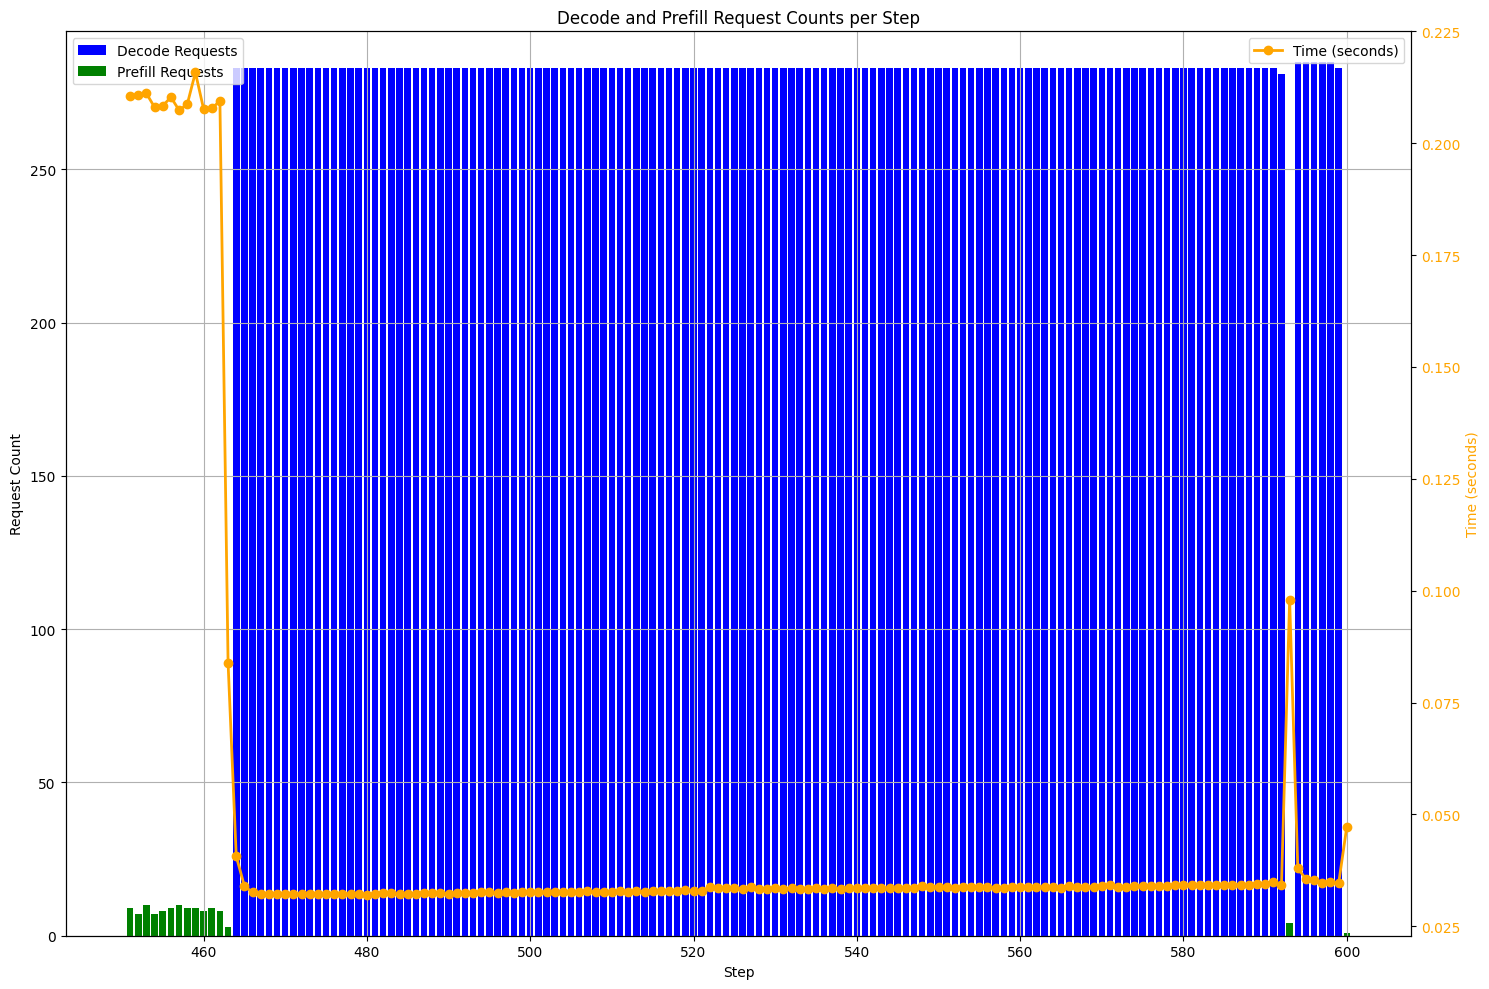

In [26]:
# Draw a chart from output.txt
x=450
y=600
# draw a bar chart, different color for different x[i]
import matplotlib.pyplot as plt
import numpy as np
if x is None:
    x = 0
if y is None:
    y = len(decode_context_tokens_list)
decode_reqs_list_tmp = decode_reqs_list[x:y]
decode_tokens_list_tmp = decode_tokens_list[x:y]
decode_context_tokens_list_tmp = decode_context_tokens_list[x:y]
prefill_reqs_list_tmp = prefill_reqs_list[x:y]
prefill_tokens_list_tmp = prefill_tokens_list[x:y]
execute_time_list_tmp = execute_time_list[x:y]
steps_tmp = steps[x:y]
# 创建画布
fig, ax1 = plt.subplots(figsize=(15, 10))

# 创建堆叠条形图（显示请求数量）
ax1.bar(steps_tmp, decode_reqs_list_tmp, label='Decode Requests', color='blue')  # 解码请求，用蓝色表示
ax1.bar(steps_tmp, prefill_reqs_list_tmp, label='Prefill Requests', bottom=decode_reqs_list_tmp, color='green')  # 预填充请求，用绿色表示，并叠加在解码请求上

# 设置左侧 Y 轴标签和标题
ax1.set_xlabel('Step')  # X轴标签
ax1.set_ylabel('Request Count')  # Y轴标签（左侧）
ax1.set_title('Decode and Prefill Request Counts per Step')  # 图表标题
ax1.grid(True)
ax1.set_ylim(0, np.max(decode_reqs_list_tmp + prefill_reqs_list_tmp) + 10)

# 创建右侧 Y 轴（显示时间）
ax2 = ax1.twinx()
ax2.plot(steps_tmp, execute_time_list_tmp, color='orange', marker='o', label='Time (seconds)', linestyle='-', linewidth=2)  # 时间折线图，用橙色表示

# 设置右侧 Y 轴标签
ax2.set_ylabel('Time (seconds)', color='orange')  # Y轴标签（右侧）
ax2.tick_params(axis='y', labelcolor='orange')  # 设置右侧 Y 轴标签颜色为橙色

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 调整布局避免遮挡
plt.tight_layout()

# 显示图表
plt.show()

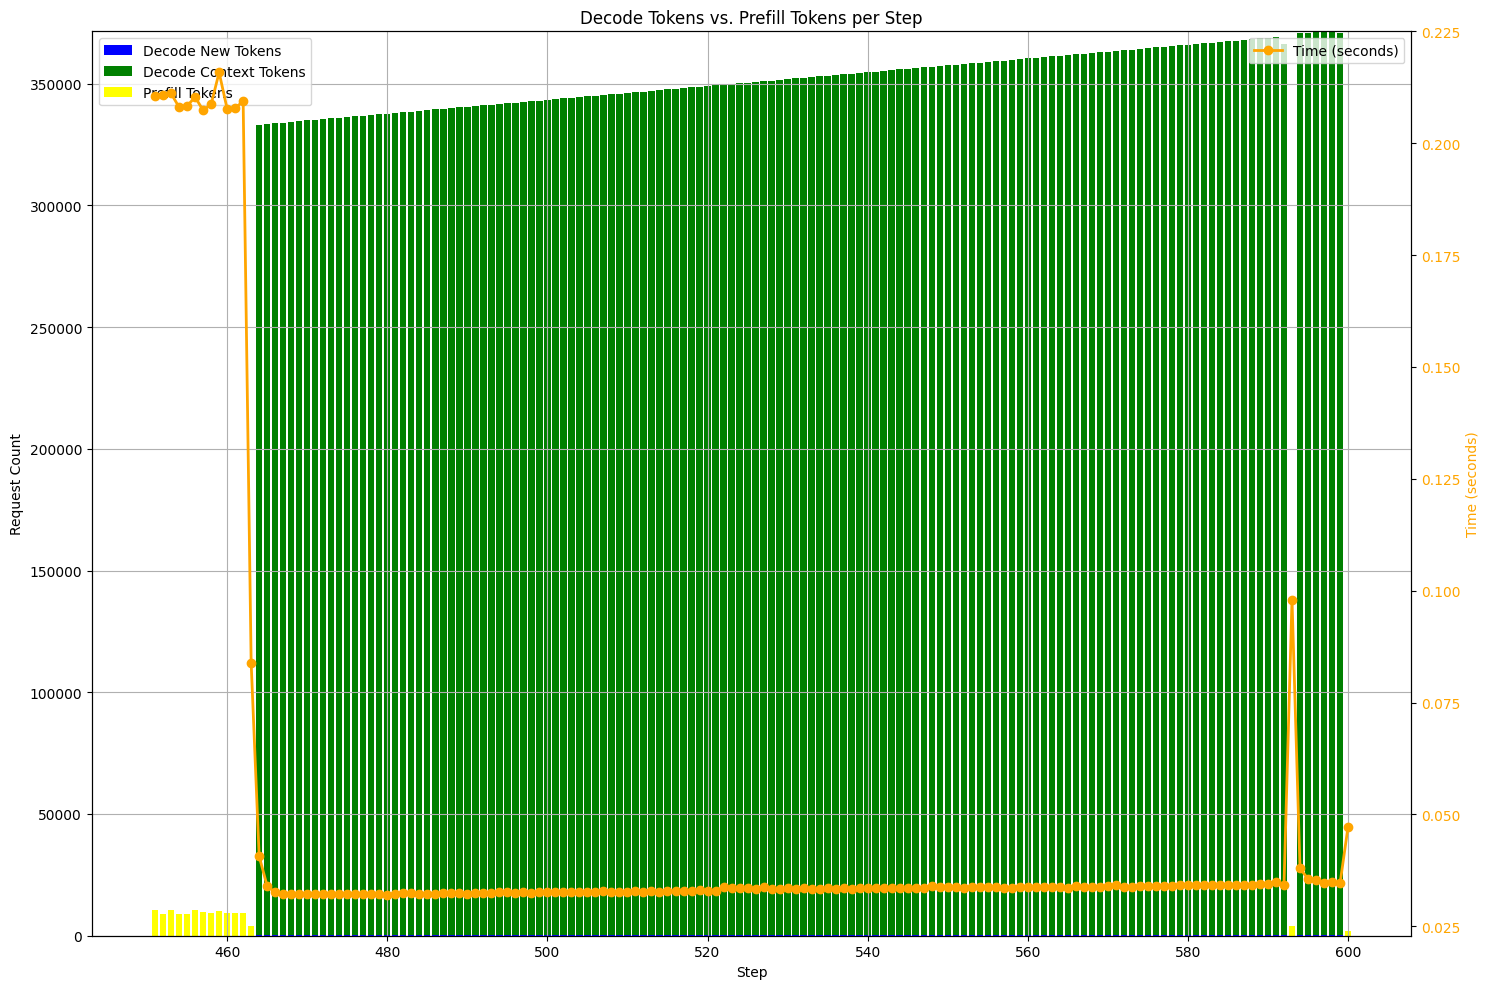

In [27]:
# Draw a chart from output.txt
x=450
y=600
# draw a bar chart, different color for different x[i]
import matplotlib.pyplot as plt
import numpy as np
if x is None:
    x = 0
if y is None:
    y = len(decode_context_tokens_list)
decode_reqs_list_tmp = decode_reqs_list[x:y]
decode_tokens_list_tmp = decode_tokens_list[x:y]
decode_context_tokens_list_tmp = decode_context_tokens_list[x:y]
prefill_reqs_list_tmp = prefill_reqs_list[x:y]
prefill_tokens_list_tmp = prefill_tokens_list[x:y]
execute_time_list_tmp = execute_time_list[x:y]
steps_tmp = steps[x:y]
# 创建画布
fig, ax1 = plt.subplots(figsize=(15, 10))

# 创建堆叠条形图（显示请求数量）
ax1.bar(steps_tmp, decode_tokens_list_tmp, label='Decode New Tokens', color='blue')  # 解码请求，用蓝色表示
ax1.bar(steps_tmp, decode_context_tokens_list_tmp, label='Decode Context Tokens', bottom=decode_tokens_list_tmp, color='green')  # 预填充请求，用绿色表示，并叠加在解码请求上
ax1.bar(steps_tmp, prefill_tokens_list_tmp, label='Prefill Tokens', bottom=decode_context_tokens_list_tmp, color='yellow')

# 设置左侧 Y 轴标签和标题
ax1.set_xlabel('Step')  # X轴标签
ax1.set_ylabel('Request Count')  # Y轴标签（左侧）
ax1.set_title('Decode Tokens vs. Prefill Tokens per Step')  # 图表标题
ax1.grid(True)
ax1.set_ylim(0, np.max(decode_tokens_list_tmp + decode_context_tokens_list_tmp + prefill_tokens_list_tmp) + 10)

# 创建右侧 Y 轴（显示时间）
ax2 = ax1.twinx()
ax2.plot(steps_tmp, execute_time_list_tmp, color='orange', marker='o', label='Time (seconds)', linestyle='-', linewidth=2)  # 时间折线图，用橙色表示

# 设置右侧 Y 轴标签
ax2.set_ylabel('Time (seconds)', color='orange')  # Y轴标签（右侧）
ax2.tick_params(axis='y', labelcolor='orange')  # 设置右侧 Y 轴标签颜色为橙色

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 调整布局避免遮挡
plt.tight_layout()

# 显示图表
plt.show()

In [33]:
file = open('output.txt', 'r')
lines = file.readlines()
decode_reqs_list = []
prefill_reqs_list = []
context_token_list = []
extend_token_list = []
execute_time_list = []
steps = range(1, len(lines) + 1)
for line in lines:
    # print(f"{decode_reqs} {decode_tokens} {decode_context_tokens} {prefill_reqs} {prefill_tokens}", file=open("output.txt", "a"), end=' ')
    decode_reqs, prefill_reqs, context_token, extend_token, execute_time = line.split(' ')
    decode_reqs_list.append(int(decode_reqs))
    prefill_reqs_list.append(int(prefill_reqs))
    context_token_list.append(int(context_token))
    extend_token_list.append(int(extend_token))
    execute_time_list.append(float(execute_time))

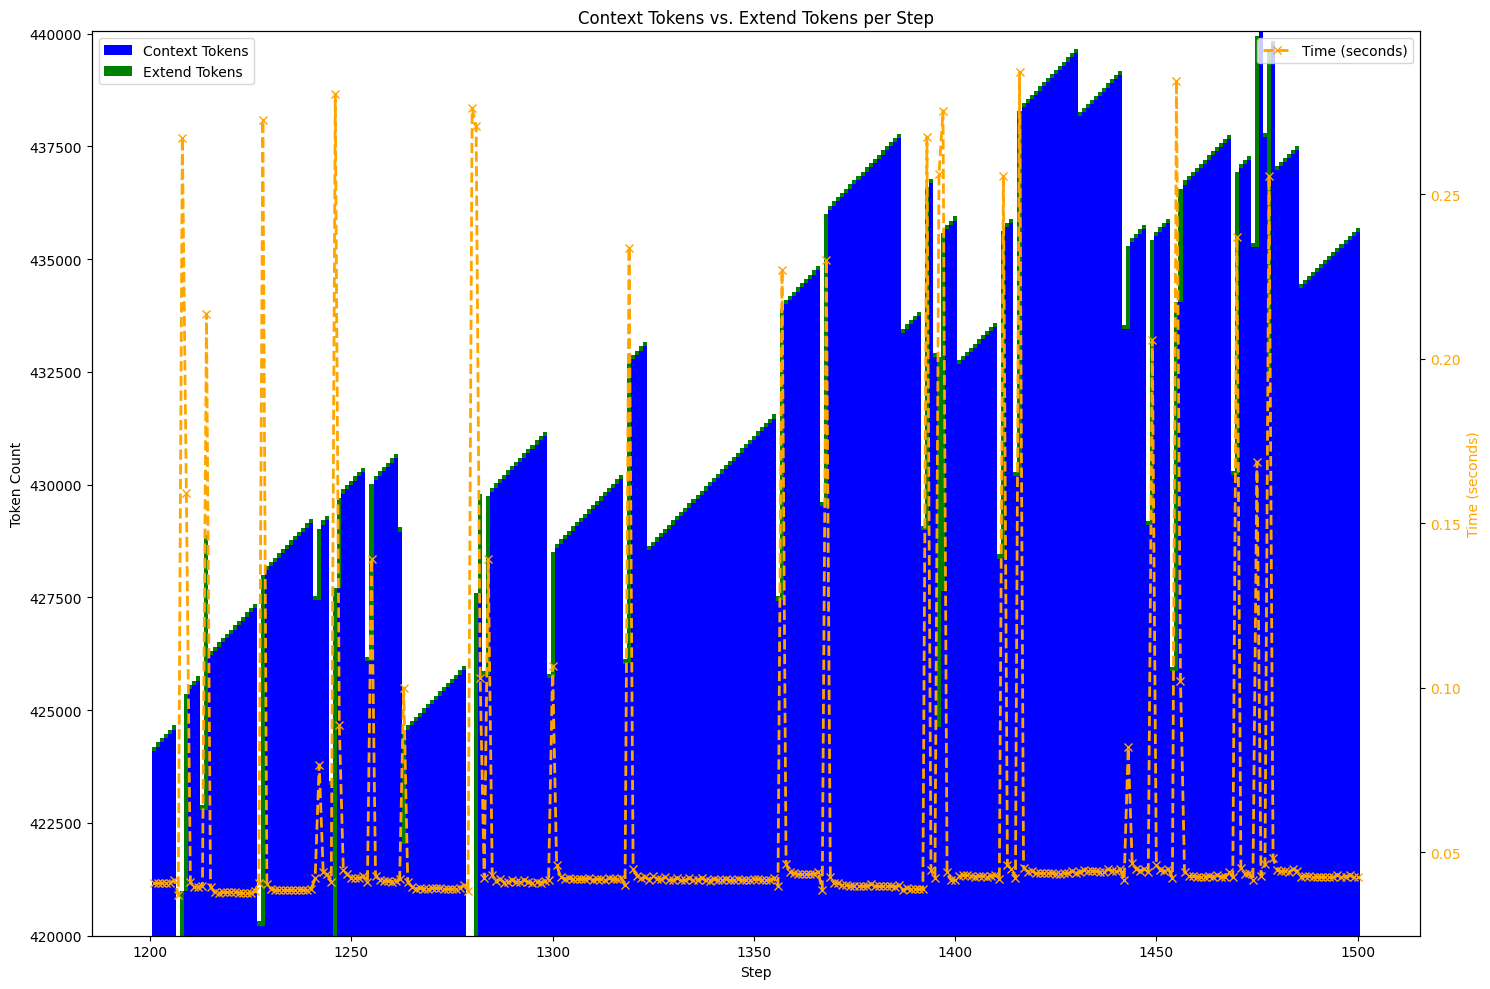

In [49]:
# Draw a chart from output.txt
x=1200
y=1500
# draw a bar chart, different color for different x[i]
import matplotlib.pyplot as plt
import numpy as np
if x is None:
    x = 0
if y is None:
    y = len(decode_reqs_list)
decode_reqs_list_tmp = decode_reqs_list[x:y]
prefill_reqs_list_tmp = prefill_reqs_list[x:y]
context_token_list_tmp = context_token_list[x:y]
extend_token_list_tmp = extend_token_list[x:y]
execute_time_list_tmp = execute_time_list[x:y]
steps_tmp = steps[x:y]
# 创建画布
fig, ax1 = plt.subplots(figsize=(15, 10))
bar_width = 1.0

# 创建堆叠条形图（显示请求数量）
ax1.bar(steps_tmp, context_token_list_tmp, label='Context Tokens', width=bar_width, color='blue')  # 解码请求，用蓝色表示
ax1.bar(steps_tmp, extend_token_list_tmp, label='Extend Tokens', width=bar_width, bottom=context_token_list_tmp, color='green')  # 预填充请求，用绿色表示，并叠加在解码请求上

# 设置左侧 Y 轴标签和标题
ax1.set_xlabel('Step')  # X轴标签
ax1.set_ylabel('Token Count')  # Y轴标签（左侧）
ax1.set_title('Context Tokens vs. Extend Tokens per Step')  # 图表标题
# ax1.grid(True)
ax1.set_ylim(420000, np.max(context_token_list_tmp + extend_token_list_tmp) + 10)

# 创建右侧 Y 轴（显示时间）
ax2 = ax1.twinx()
ax2.plot(steps_tmp, execute_time_list_tmp, color='orange', marker='x', label='Time (seconds)', linestyle='--', linewidth=2)  # 时间折线图，用橙色表示

# 设置右侧 Y 轴标签
ax2.set_ylabel('Time (seconds)', color='orange')  # Y轴标签（右侧）
ax2.tick_params(axis='y', labelcolor='orange')  # 设置右侧 Y 轴标签颜色为橙色

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 调整布局避免遮挡
plt.tight_layout()

# 显示图表
plt.show()